['Week 1', 'S', 'Age Cat 1', '47']
['Week 1', 'S', 'Age Cat 2', '50']
['Week 1', 'S', 'Age Cat 3', '92']
['Week 1', 'S', 'Age Cat 4', '84']
['Week 1', 'S', 'Age Cat 5', '50']
[47.0, 50.0, 92.0, 84.0, 50.0]
1 323.0 #252525
1 273.0 #636363
1 189.0 #969696
1 97.0 #cccccc
1 47.0 #f7f7f7


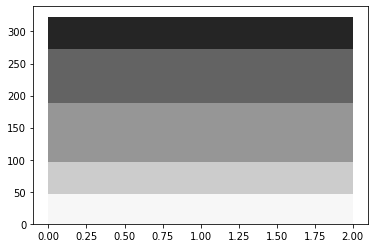

In [18]:
# S/E/I/R : 4 bars in each group
# each group is one week
# age cat 1 to 5; 5 categories vertically in each bar

# csv format input 
# each row has three keys which together identify the row uniquely (age; week; SEIR)


import numpy as np
import matplotlib.pyplot as plt
import csv




# generate dummy data
with open('dummy_data.csv','w') as f:
    csvwriter = csv.writer(f)
    csvwriter.writerow(['Week','State_SEIR','Age_Cat','Value'])
    for i in ['Week 1', 'Week 2', 'Week 3']: # 3 weeks
        for j in ['S','E','I','R']:
            for k in ['Age Cat 1', 'Age Cat 2', 'Age Cat 3', 'Age Cat 4', 'Age Cat 5']:
                csvwriter.writerow([i,j,k, int(np.random.rand()*100)])


# inputs: 
vertical_stacking_variable = 'Age_Cat'
sorted_order_for_stacking = ['Age Cat 1', 'Age Cat 2', 'Age Cat 3', 'Age Cat 4', 'Age Cat 5']

# colormaps 
# we need 4 colormaps for SEIR
c_map_vertical_1 = ['#f7f7f7','#cccccc','#969696','#636363','#252525']
c_map_vertical_2 = ['#edf8fb','#b3cde3','#8c96c6','#8856a7','#810f7c']
c_map_vertical_3 = ['#fef0d9','#fdcc8a','#fc8d59','#e34a33','#b30000']
c_map_vertical_4 = ['#f1eef6','#bdc9e1','#74a9cf','#2b8cbe','#045a8d']


# order of plotting- one bar at a time
# plot 1 bar for S, then 1 for E and so on
# after the above is complete, we do the same for different weeks

## 
width = 2
state = 'S'
week = 'Week 1'


a = [0] * len(sorted_order_for_stacking)
for i in range(len(sorted_order_for_stacking)):
    with open('dummy_data.csv') as f:
        next(f) # skip the first line
        for row in f:
            listed = row.strip().split(',')
            if listed[1] == state and listed[0] == week and listed[2] == sorted_order_for_stacking[i]:
                print (listed)
                a[i]= (float(listed[3]))
print (a)
cum_val = [a[0]]
for j in range(1,len(a)):
    cum_val.append( cum_val[j-1] + a[j] )

for i in range(len(sorted_order_for_stacking)-1,-1,-1):
    plt.bar(1,height=cum_val[i] , width=width, color=c_map_vertical_1[i])

# plt.bar(x1,height=[2,3,4,6] , width=width)

plt.show()